In [1]:
## import packages
import os
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import catboost
from catboost import CatBoostClassifier, Pool, cv, CatBoostError
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import shap
import pickle
from shap_sort import customized_shap
import matplotlib.colors as colors
from sklearn.metrics import classification_report
from catboost.utils import get_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt 

In [2]:
data_dir = "/global/homes/z/zimingy/KE-Catboost/ziming/GO/data"
trained_model = os.path.join(data_dir, 'catboost_model', 'GO_model_1.json')
try:
    model.load_model(trained_model, format='json')
except:
    print("Model does not exist.")

Model does not exist.


In [3]:
## load test pickle
test_pickle = os.path.join(data_dir, 'go_aggregated_4.1/splited_dataset', 'test_set.pkl')
test_set = pd.read_pickle(test_pickle)
X_test = test_set[test_set.columns[1:]]
y_test = test_set['biome']
print("test dataset shape:", X_test.shape)
print("test label shape:", y_test.shape)

test dataset shape: (8911, 4403)
test label shape: (8911,)


In [4]:
%%time
with open('shap_values_train.pkl', 'rb') as f:
    shap_values_train = pickle.load(f)

CPU times: user 17.5 s, sys: 1min 52s, total: 2min 9s
Wall time: 2min 10s


In [5]:
with open('shap_values_2.pkl', 'rb') as f:
    shap_values_test = pickle.load(f)

In [6]:
my_shap = customized_shap()

In [7]:
## load group map and color map
group_dict = my_shap.group_dict
combined_cmap = my_shap.color_map

In [8]:
group_shap_values_test = []
for biome, idxes_list in group_dict.items():
    if len(idxes_list) > 1:
        shap_values_array = np.array(shap_values_test[idxes_list[0]: idxes_list[-1]+1])
        shap_values_array_mean = np.mean(shap_values_array, axis = 0)
    else:
        shap_values_array_mean = shap_values_test[idxes_list[0]]
    group_shap_values_test.append(shap_values_array_mean)

## before sorting

This is default shap summary_plot from shap package

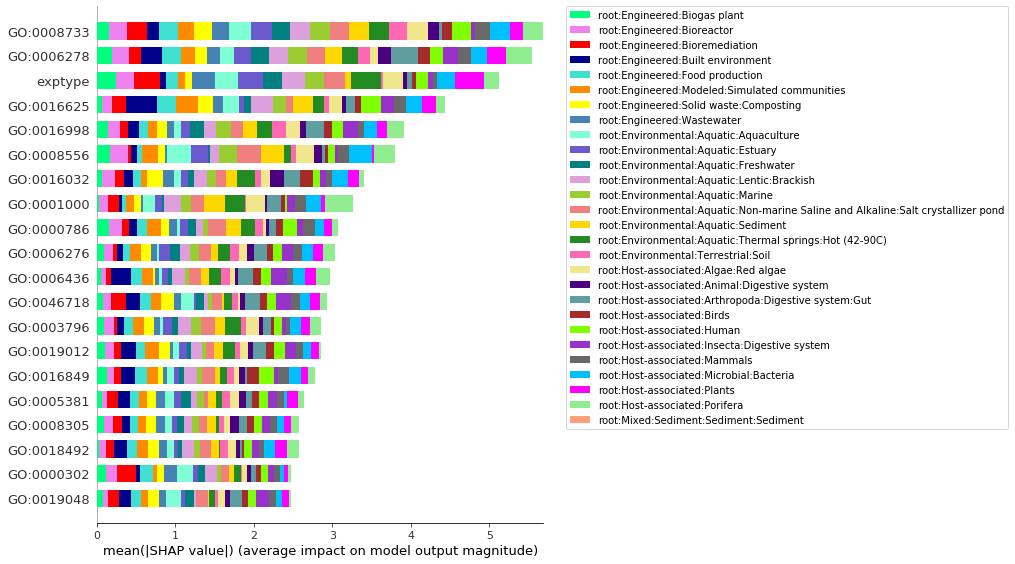

In [9]:
shap.summary_plot(group_shap_values_test, X_test, max_display=20, class_names=list(group_dict.keys()), class_inds = "original", color=combined_cmap , show=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('shap_summary_first_100.png',bbox_inches='tight')

## after sorting

code below uses customized sort_shap_plot, sorted by target_feature: 'root:Engineered:Built environment'

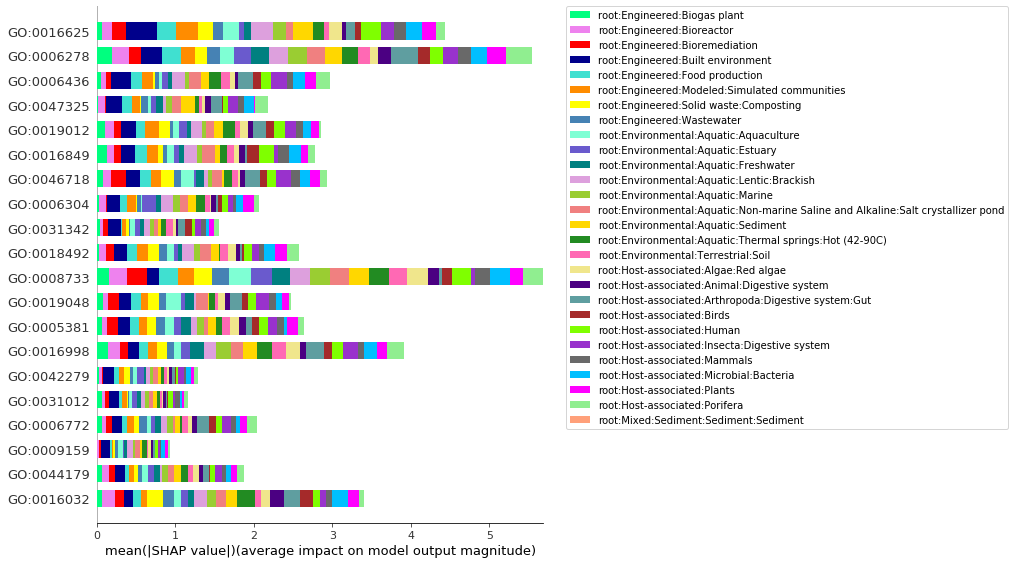

In [11]:
my_shap.sort_shap_plot(group_shap_values_test, X_test, target_feature='root:Engineered:Built environment', class_names=list(group_dict.keys()), class_inds = "original", color=combined_cmap , show=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
model._classes

NameError: name 'model' is not defined